## Imports

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import json


# Models List
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Pre-Processing
from sklearn.preprocessing import LabelEncoder
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
# 
from sklearn.model_selection import train_test_split

In [2]:
# Constants
RANDOM_SEED = 42

## Loading Data
Let's load the data

In [3]:
df = pd.read_csv("../Data/experiment_with_lat_and_lng.csv") 
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AREA,FINAL_ADDRESS,lat,lng
3,2,WAKEFIELD,02 TWO FAMILY DWELLINGS,1,5009,1,B3,1800 BUSSING AVENUE,10466.0,2.0,...,2193.0,1930.0,1,B3,310000,2019-06-14,bronx,1800 BUSSING AVENUE NYC,40.894052,-73.848705
85,5,PORT RICHMOND,01 ONE FAMILY DWELLINGS,1,1123,25,A5,37 NEWARK AVENUE,10302.0,1.0,...,1200.0,2003.0,1,A5,324000,2019-12-12,statenisland,37 NEWARK AVENUE NYC,40.637381,-74.143528
92,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1,11805,41,A1,135-16 LEFFERTS BLVD,11420.0,1.0,...,1322.0,1925.0,1,A1,555000,2019-10-09,queens,135-16 LEFFERTS BLVD NYC,40.670031,-73.821359
2,4,BAYSIDE,02 TWO FAMILY DWELLINGS,1,5952,20,B2,215-29 23RD ROAD,11360.0,2.0,...,3078.0,1970.0,1,B2,800000,2019-07-05,queens,215-29 23RD ROAD NYC,40.782845,-73.774405
82,4,EAST ELMHURST,01 ONE FAMILY DWELLINGS,1,1107,25,A5,24-38 97TH STREET,11369.0,1.0,...,1995.0,1930.0,1,A5,730000,2019-04-10,queens,24-38 97TH STREET NYC,40.765233,-73.873076


## Pre-Processing - DELETE THIS !!!!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     object 
 2   BUILDING CLASS CATEGORY                98 non-null     object 
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     object 
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     object 
 7   ADDRESS                                98 non-null     object 
 8   ZIP CODE                               98 non-null     float64
 9   RESIDENTIAL UNITS                      98 non-null     float64
 10  COMMERCIAL UNITS                       98 non-null     float64
 11  TOTAL UN

In [5]:
LABELS_TO_DROP = ["ADDRESS", "FINAL_ADDRESS", "AREA"]

df.drop(labels=LABELS_TO_DROP, axis="columns", inplace=True)
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,lat,lng
80,2,WAKEFIELD,02 TWO FAMILY DWELLINGS,1,5058,64,B1,10466.0,2.0,0.0,2.0,2125.0,1574.0,1945.0,1,B1,490000,2019-09-27,40.897981,-73.843953
96,3,BUSHWICK,02 TWO FAMILY DWELLINGS,1,3369,134,B2,11221.0,2.0,0.0,2.0,1688.0,2850.0,1990.0,1,B2,1060000,2019-03-07,40.693824,-73.913995
71,3,CYPRESS HILLS,03 THREE FAMILY DWELLINGS,1,3672,5,C0,11207.0,3.0,0.0,3.0,3021.0,3264.0,2007.0,1,C0,800000,2019-04-15,40.676695,-73.894810
95,3,BROWNSVILLE,01 ONE FAMILY DWELLINGS,1,3856,111,A5,11212.0,1.0,0.0,1.0,1800.0,1116.0,1986.0,1,A5,475000,2019-07-19,40.658204,-73.902627
3,2,WAKEFIELD,02 TWO FAMILY DWELLINGS,1,5009,1,B3,10466.0,2.0,0.0,2.0,2505.0,2193.0,1930.0,1,B3,310000,2019-06-14,40.894052,-73.848705


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     object 
 2   BUILDING CLASS CATEGORY                98 non-null     object 
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     object 
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     object 
 7   ZIP CODE                               98 non-null     float64
 8   RESIDENTIAL UNITS                      98 non-null     float64
 9   COMMERCIAL UNITS                       98 non-null     float64
 10  TOTAL UNITS                            98 non-null     float64
 11  LAND SQU

In [7]:
for object_type_data in df.select_dtypes(include='object'):
    lb=LabelEncoder()
    df[object_type_data]=lb.fit_transform(df[object_type_data].values)
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,BUILDING CLASS AS OF FINAL ROLL 18/19,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,lat,lng
47,5,37,0,0,1227,44,3,10303.0,1.0,0.0,1.0,4288.0,1376.0,1965.0,1,3,325000,36,40.636238,-74.159875
45,2,3,1,0,3053,5,8,10458.0,2.0,0.0,2.0,1420.0,2805.0,1901.0,1,8,649500,53,40.854979,-73.892016
71,3,12,2,0,3672,5,9,11207.0,3.0,0.0,3.0,3021.0,3264.0,2007.0,1,9,800000,21,40.676695,-73.894810
90,4,22,0,0,5689,7,0,11365.0,1.0,0.0,1.0,4000.0,1694.0,1950.0,1,0,855000,13,40.741053,-73.789506
29,4,32,0,0,9804,36,1,11432.0,1.0,0.0,1.0,2500.0,1704.0,1920.0,1,1,750000,62,40.708669,-73.790030


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BOROUGH                                98 non-null     int64  
 1   NEIGHBORHOOD                           98 non-null     int32  
 2   BUILDING CLASS CATEGORY                98 non-null     int32  
 3   TAX CLASS AS OF FINAL ROLL 18/19       98 non-null     int32  
 4   BLOCK                                  98 non-null     int64  
 5   LOT                                    98 non-null     int64  
 6   BUILDING CLASS AS OF FINAL ROLL 18/19  98 non-null     int32  
 7   ZIP CODE                               98 non-null     float64
 8   RESIDENTIAL UNITS                      98 non-null     float64
 9   COMMERCIAL UNITS                       98 non-null     float64
 10  TOTAL UNITS                            98 non-null     float64
 11  LAND SQU

In [9]:
cat_columns = df.select_dtypes(include=['int64','int32']).columns
print(cat_columns)
for curr_column in cat_columns:
    print("{} column distribution:".format(curr_column))
    print(df[curr_column].value_counts())
    print()

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK', 'LOT',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')
BOROUGH column distribution:
4    35
3    33
5    17
2    13
Name: BOROUGH, dtype: int64

NEIGHBORHOOD column distribution:
19    4
14    3
4     3
48    3
9     3
     ..
66    1
32    1
31    1
30    1
0     1
Name: NEIGHBORHOOD, Length: 68, dtype: int64

BUILDING CLASS CATEGORY column distribution:
0    49
1    38
2     9
4     1
3     1
Name: BUILDING CLASS CATEGORY, dtype: int64

TAX CLASS AS OF FINAL ROLL 18/19 column distribution:
0    96
1     2
Name: TAX CLASS AS OF FINAL ROLL 18/19, dtype: int64

BLOCK column distribution:
12064    2
8304     1
3493     1
9000     1
3369     1
        ..
3291     1
1116     1
4957     1
4958     1
12548    1
Name: BLOCK, Length: 97, dtype: int64

LOT column di

## Models

In [10]:
# split the data into train and test set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)

train_y = train_df['SALE PRICE']
train_x = train_df.drop(['SALE PRICE'], axis=1)

test_y = test_df['SALE PRICE']
test_x = test_df.drop(['SALE PRICE'], axis=1)

## Plotting functions defenitions

In [11]:
def plot_predicted_vs_real(predicted_y, real_y):
    """
    predicted_y: The predicted target Series as gained from model.predict()
    real_y: The actual target Series
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(real_y, predicted_y)
    x , y = list(range(min(real_y), max(real_y))), list(range(min(real_y), max(real_y)))
    plt.scatter(x,y)
    std = real_y.std()
    plt.fill_between(x, y + std, y - std, facecolor='r', alpha=0.1)
    plt.xlabel("Real Price")
    plt.ylabel("Predicted Price")
    plt.show()

In [12]:
def plot_vs_map(test_x, predicted_y, real_y, path_to_map="../Images/nyc_map1.png", border_box=[-74.212974, -73.73724190000001, 40.520321200000005, 40.8979809], title='Plotting Spatial Data on New-York map'):
    """
    """
    # Get the points whos error is less then the mse
    std = real_y.std()
    mean = real_y.std()
    less_then_std = test_x[(test_predicted_y > mean - std) & (test_predicted_y < mean + std)]
    more_then_std = test_x[~((test_predicted_y > mean -std) & (test_predicted_y < mean + std))]
    # Plot the map
    ruh_m = plt.imread(path_to_map)
    fig, ax = plt.subplots(figsize = (8,7))
    # Print good points
    ax.scatter(less_then_std.lng, less_then_std.lat, zorder=1, alpha= 0.4, c='b', s=30)
    # Print Bad points
    ax.scatter(more_then_std.lng, more_then_std.lat, zorder=1, alpha= 0.4, c='r', s=30)

    ax.set_title(title)
    ax.set_xlim(border_box[0],border_box[1])
    ax.set_ylim(border_box[2],border_box[3])
    ax.imshow(ruh_m, zorder=0, extent = border_box, aspect= 'equal')

## Linear Regression

In [13]:
linear_regression = LinearRegression(n_jobs=len(df))
linear_regression.fit(train_x, train_y)
test_predicted_y = linear_regression.predict(test_x)

In [14]:
print(f"Linear Regression MSE:{mean_squared_error(test_y, test_predicted_y)}")
print(f"Linear Regression R2 score:{r2_score(test_y, test_predicted_y)}")

Linear Regression MSE:110818520186.41524
Linear Regression R2 score:0.4131481864759765


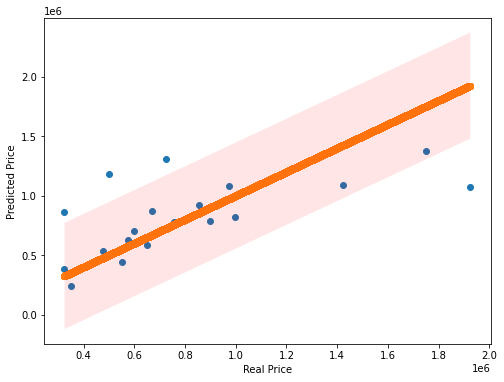

In [15]:
plot_predicted_vs_real(test_predicted_y, test_y)

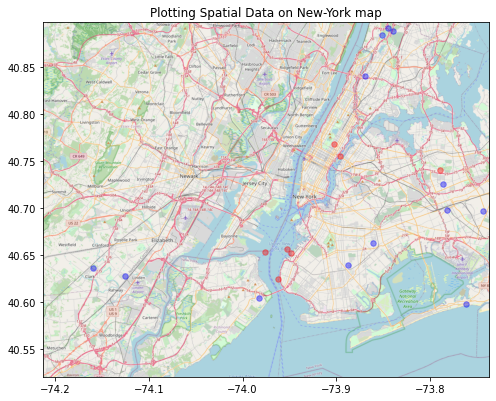

In [16]:
with open("../Images/nyc_map1.json") as file:
    border_box = json.load(file)
plot_vs_map(test_x, test_predicted_y, test_y, path_to_map="../Images/nyc_map1.png", border_box=border_box, title='Plotting Spatial Data on New-York map')


## Random Forest Regressor

In [17]:
#Random Forest constants
N_ESTIMATORS = 100

In [18]:
# random_forest_regression = RandomForestRegressor(n_estimators=N_ESTIMATORS, criterion="mse", max_depth=, n_jobs=N_ESTIMATORS, random_state=RANDOM_SEED)
random_forest_regression = RandomForestRegressor(n_estimators=N_ESTIMATORS, criterion="mse", n_jobs=N_ESTIMATORS, random_state=RANDOM_SEED)
random_forest_regression.fit(train_x, train_y)
test_predicted_y = random_forest_regression.predict(test_x)

In [19]:
print(f"Random Forest Regression MSE:{mean_squared_error(test_y, test_predicted_y)}")
print(f"Random Forest R2 score:{r2_score(test_y, test_predicted_y)}")

Random Forest Regression MSE:122514750705.95332
Random Forest R2 score:0.35120949535972945


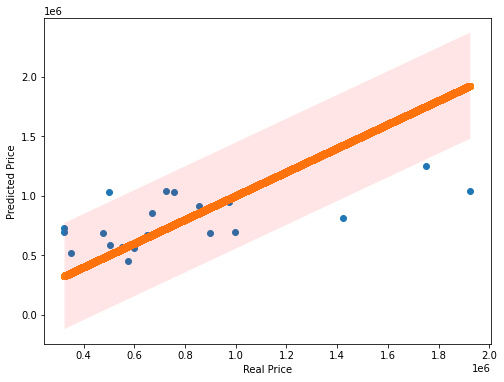

In [20]:
plot_predicted_vs_real(test_predicted_y, test_y)

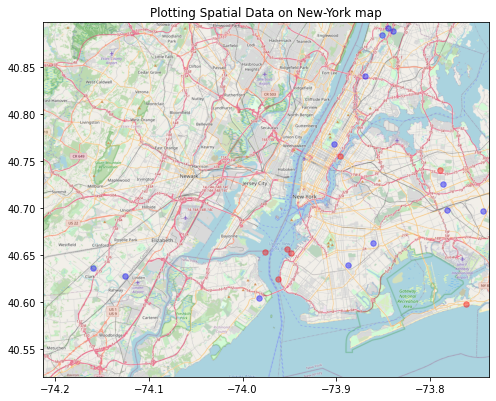

In [21]:

with open("../Images/nyc_map1.json") as file:
    border_box = json.load(file)
plot_vs_map(test_x, test_predicted_y, test_y, path_to_map="../Images/nyc_map1.png", border_box=border_box, title='Plotting Spatial Data on New-York map')
